In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

## Read in Data

In [11]:
df = pd.read_csv('./data/final.csv')

In [12]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Year
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0,1990.0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1,1990.0
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0,1990.0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0,1990.0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0,1990.0


## Train-Test-Split

In [13]:
X = df.drop(columns = ['track', 'artist', 'uri', 'target', 'Year'])
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [15]:
y.value_counts(normalize = True)

0    0.5
1    0.5
Name: target, dtype: float64

## Model 1: Basic Decision Tree

In [7]:
dt = DecisionTreeClassifier()

In [8]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
pred = dt.predict(X_test)

In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


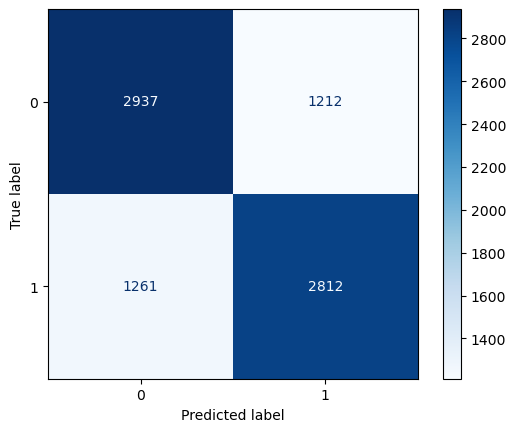

In [11]:
plot_confusion_matrix(dt, X_test, y_test, cmap='Blues', values_format='d');

In [12]:
spec = tn/ (tn+fp)
print(f'Specificity: {spec}')

Specificity: 0.707881417208966


In [13]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuray: {accuracy}')

f1 = f1_score(y_test, pred)
print(f'F1 Score: {f1}')

Accuray: 0.6992216005837996
F1 Score: 0.6945782388538965


## Model 2: Simple Decision Tree + Standard Scaling

In [14]:
dt = DecisionTreeClassifier()

In [15]:
# Create a StandardScaler object
sc = StandardScaler()

# Standardize the training and test data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [16]:
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [17]:
pred = dt.predict(X_test_sc)

In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


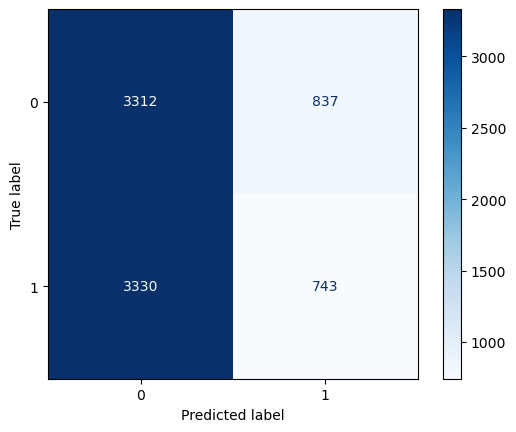

In [19]:
plot_confusion_matrix(dt, X_test, y_test, cmap='Blues', values_format='d');

In [20]:
spec = tn/ (tn+fp)
print(f'Specificity: {spec}')

Specificity: 0.7045071101470234


In [21]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuray: {accuracy}')

f1 = f1_score(y_test, pred)
print(f'F1 Score: {f1}')

Accuray: 0.7003162247628314
F1 Score: 0.6970740103270223


## Model 3: Decision Tree w/ Paramaters

In [22]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [23]:
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [24]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
dt_best = grid_search.best_estimator_

In [26]:
pred = dt.predict(X_test)

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


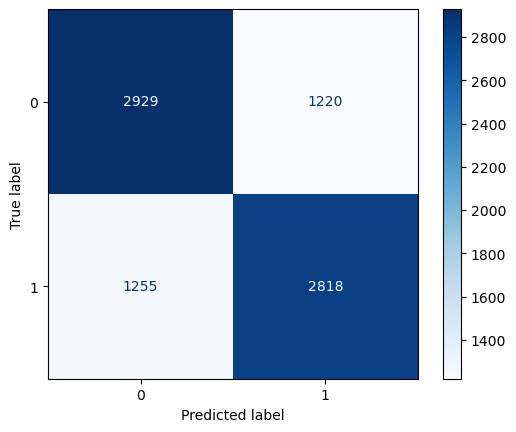

In [28]:
plot_confusion_matrix(dt, X_test, y_test, cmap='Blues', values_format='d');

In [29]:
spec = tn/ (tn+fp)
print(f'Specificity: {spec}')

Specificity: 0.7059532417449988


In [30]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuray: {accuracy}')

f1 = f1_score(y_test, pred)
print(f'F1 Score: {f1}')

Accuray: 0.6989783507662369
F1 Score: 0.6948588336826531


## Decision Tree with More Params

In [16]:
param_grid_tree = {'max_depth': [1, 2, 3, 4, 5],
                   'min_samples_leaf': [1, 2, 3, 4, 5],
                   'min_samples_split': [2, 3, 4, 5]}

In [17]:
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid=param_grid_tree, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [18]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
dt_best = grid_search.best_estimator_

In [20]:
pred = dt.predict(X_test)

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

/Users/pomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


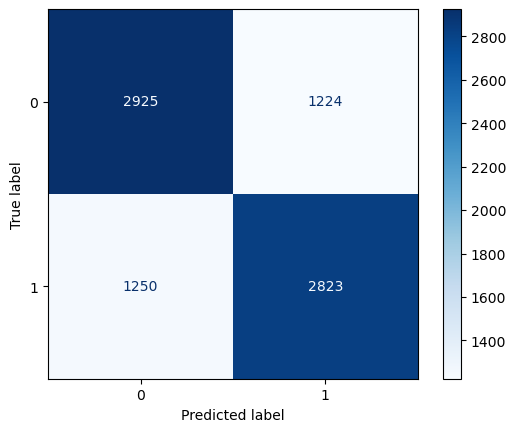

In [22]:
plot_confusion_matrix(dt, X_test, y_test, cmap='Blues', values_format='d');

In [23]:
spec = tn/ (tn+fp)
print(f'Specificity: {spec}')

Specificity: 0.7049891540130152


In [24]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print(f'Accuray: {accuracy}')

f1 = f1_score(y_test, pred)
print(f'F1 Score: {f1}')

Accuray: 0.6990999756750182
F1 Score: 0.6953201970443349
